In [1]:
import pandas as pd
import numpy as np

In [2]:
df_diab = pd.read_csv('diabetes.csv')

In [3]:
df_diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df_diab.Outcome.unique()

array([1, 0])

In [5]:
df_diab.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df_diab.shape

(768, 9)

In [7]:
X = df_diab.drop(['Outcome'],axis=1)
y = df_diab[['Outcome']]

In [9]:
np.random.seed(12345)

In [8]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train,y_test = train_test_split(X,
                                                   y,
                                                   stratify = y,
                                                   test_size=0.2,
                                                   random_state=12345)

In [11]:
X_train.shape

(614, 8)

In [12]:
X_test.shape

(154, 8)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
import tensorflow as tf

In [16]:
from tensorflow.keras.models import Sequential

In [17]:
from tensorflow.keras.layers import Dense, Dropout, Input

In [63]:
model = Sequential()

In [64]:
X_train_scaled.shape[1]

8

In [65]:
model.add(Input(shape = (X_train_scaled.shape[1],)))

In [66]:
# First Hidden Layer - 128 neurons, Relu activation
model.add(Dense(units=128,
                activation='relu'
         ))

In [67]:
# Second Hidden Layer - 64 neurons, Relu activation
model.add(Dense(units=64, activation='relu'))

# Third Hidden Layer 32, relu
model.add(Dense(units=32, activation='relu'))

# Output layer - Sigmoid
model.add(Dense(units=1, activation='sigmoid'))

In [68]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1152      
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [54]:
(8+1)*128

1152

In [55]:
(64+1)*32

2080

In [56]:
(32+1)*1

33

In [69]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [70]:
result = model.fit(X_train_scaled, 
                   y_train,
                   validation_data = (X_test_scaled, y_test),
                   epochs=100)

Epoch 1/100
20/20 [==============================] - 1s 12ms/step - loss: 0.6122 - accuracy: 0.6971 - val_loss: 0.5291 - val_accuracy: 0.7338
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5123 - accuracy: 0.7508 - val_loss: 0.4607 - val_accuracy: 0.7662
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4803 - accuracy: 0.7687 - val_loss: 0.4386 - val_accuracy: 0.7922
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4607 - accuracy: 0.7818 - val_loss: 0.4287 - val_accuracy: 0.7922
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4476 - accuracy: 0.7899 - val_loss: 0.4282 - val_accuracy: 0.7857
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4386 - accuracy: 0.7899 - val_loss: 0.4250 - val_accuracy: 0.7857
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4320 - accuracy: 0.7932 - val_loss: 0.4282 - val_accuracy: 0.7857
Epoch 8/100


In [34]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [36]:
confusion_matrix(y_pred=y_train_pred >= 0.5, 
                 y_true = y_train)

array([[400,   0],
       [  0, 214]])

In [38]:
tf.__version__

'2.8.0'

In [37]:
accuracy_score(y_pred=y_train_pred >= 0.5, 
               y_true = y_train)

1.0

In [42]:
confusion_matrix(y_pred=y_test_pred >= 0.5, 
                 y_true = y_test)

array([[76, 24],
       [17, 37]])

In [43]:
accuracy_score(y_pred=y_test_pred >= 0.5, 
               y_true = y_test)

0.7337662337662337

In [71]:
history = pd.DataFrame(result.history)

In [72]:
history.head()

,loss,accuracy,val_loss,val_accuracy
0,0.612175,0.697068,0.529127,0.733766
1,0.512306,0.750814,0.460677,0.766234
2,0.480342,0.768730,0.438552,0.792208
3,0.460723,0.781759,0.428744,0.792208
4,0.447622,0.789902,0.428214,0.785714


In [46]:
import matplotlib.pyplot as plt

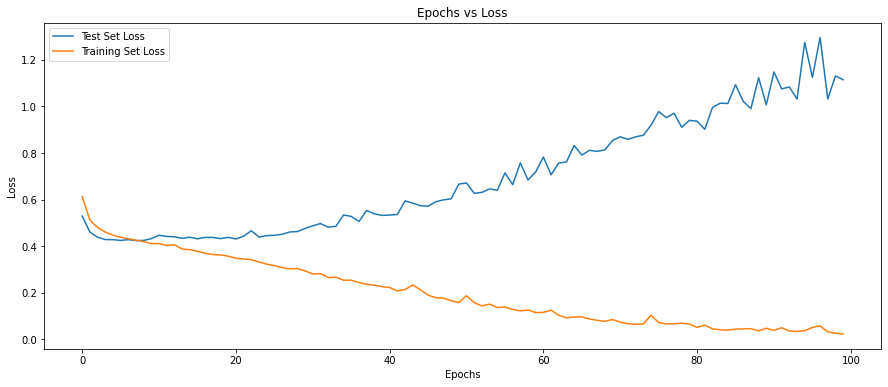

In [74]:
plt.figure(figsize = (15,6))
plt.plot(history.val_loss, label='Test Set Loss')
plt.plot(history.loss, label='Training Set Loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

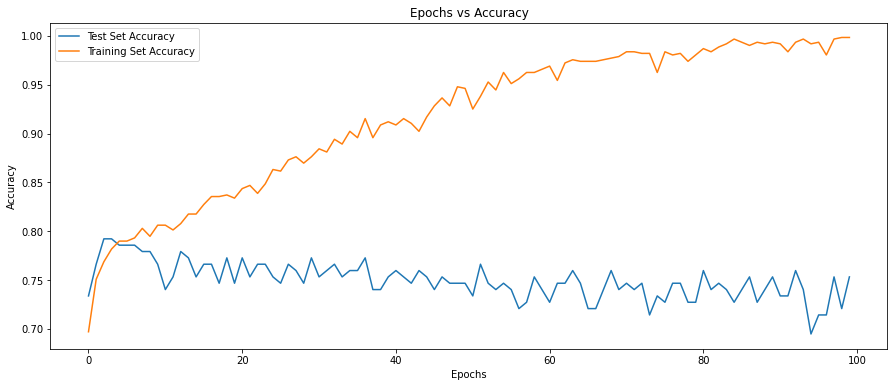

In [75]:
plt.figure(figsize = (15,6))
plt.plot(history.val_accuracy, label='Test Set Accuracy')
plt.plot(history.accuracy, label='Training Set Accuracy')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()